In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [11]:
# Generate isotropic Gaussian blobs for clustering
# X: The generated samples.
#    ndarray of shape (n_samples, n_features)
# y: The integer labels for cluster membership of each sample.
#    ndarray of shape (n_samples,)
# centers: The centers of each cluster.
#          ndarray of shape (n_centers, n_features)
X, y, centers = datasets.make_blobs(
    n_samples=150,  # The total number of points equally divided among clusters
    n_features=2,  # The number of features for each sample
    centers=2,  # The number of centers to generate, or the fixed center locations.
    cluster_std=1.05,  # The standard deviation of the clusters.
    random_state=2,  # Determines random number generation for dataset creation.
    return_centers=True  # If True, then return the centers of each cluster.
)
print(centers)

[[-1.28010196 -9.48147536]
 [ 0.99324956 -1.29355215]]


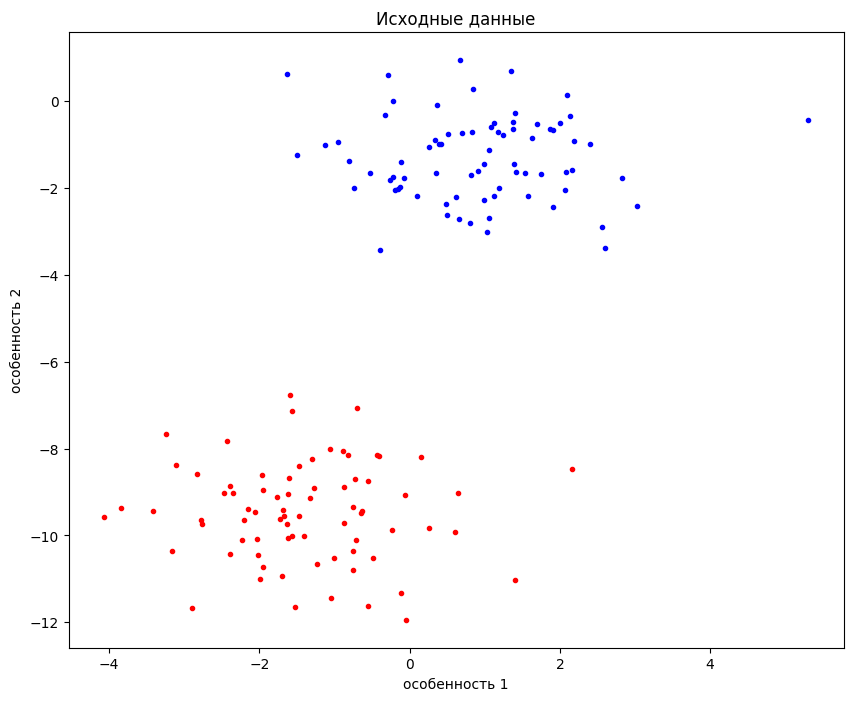

In [5]:
# Draw clusters
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r.')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'b.')
plt.xlabel("особенность 1")
plt.ylabel("особенность 2")
plt.title('Исходные данные')
plt.show()

In [6]:
# Define the Step Function
def step_func(z):
    return 1.0 if (z > 0) else 0.0

In [7]:
# Define Perceptron training function
def perceptron(X, y, lr, epochs):
    m, n = X.shape
    w = np.zeros((n+1, 1))
    n_miss_list = []

    for epoch in range(epochs):
        n_miss = 0

        for idx, x_i in enumerate(X):
            x_i = np.insert(x_i, 0, 1).reshape(-1,1)
            y_hat = step_func(np.dot(x_i.T, w))

            if (np.squeeze(y_hat) - y[idx]) != 0:
                w += lr*((y[idx] - y_hat)*x_i)
                n_miss += 1

        n_miss_list.append(n_miss)

    return w, n_miss_list

In [8]:
# Define function for boundary display
def plot_decision_boundary(X, y, w):

    x1 = [min(X[:,0]), max(X[:,0])]
    m = -w[1]/w[2]
    c = -w[0]/w[2]
    x2 = m*x1 + c

    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "r.")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "b.")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title('Perceptron')
    plt.plot(x1, x2, 'g-')
    plt.show()

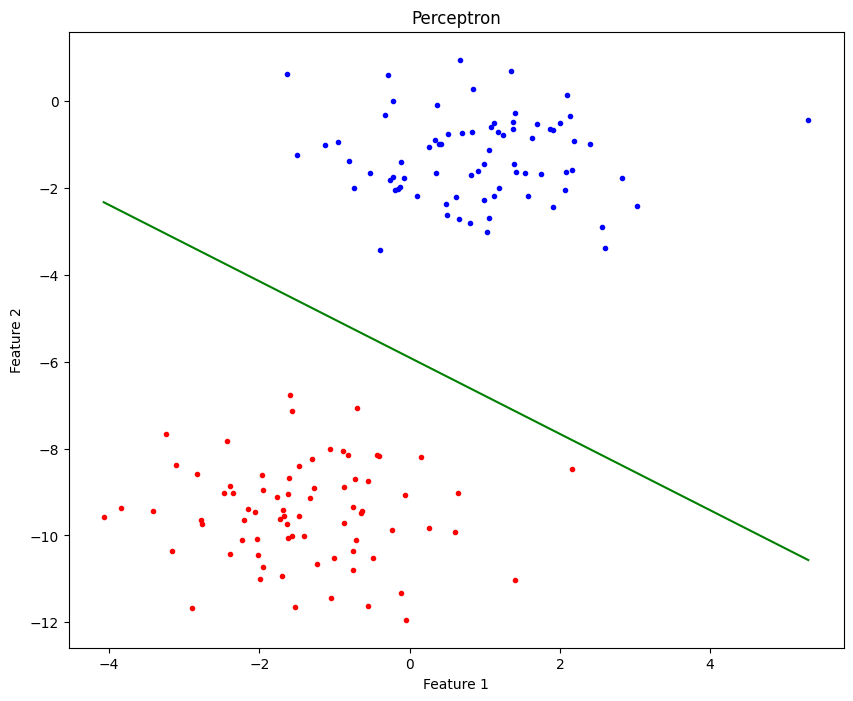

In [9]:
# Calculate and display
w, miss_l = perceptron(X, y, 0.5, 100)
plot_decision_boundary(X, y, w)

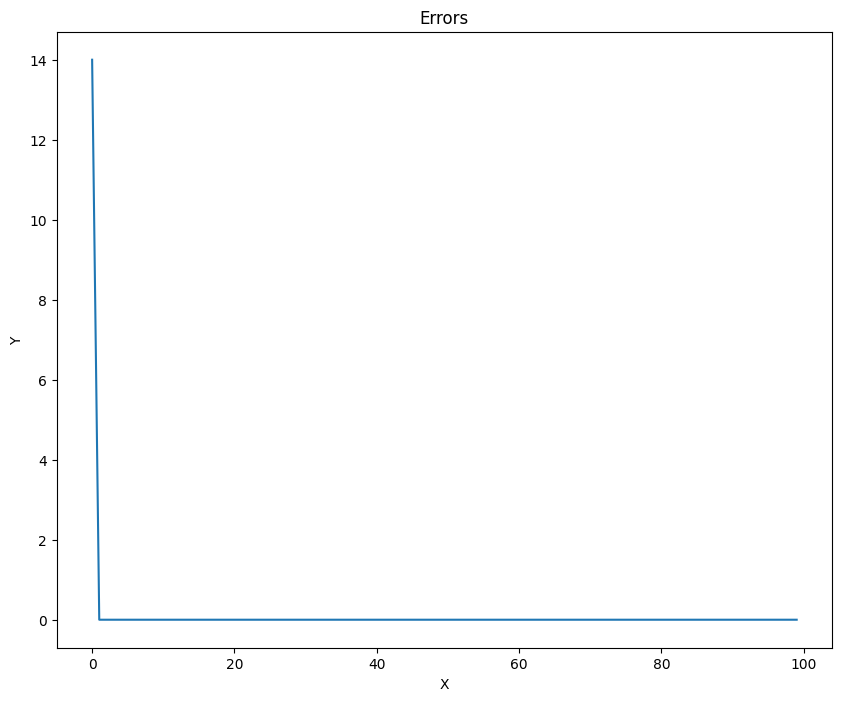

In [10]:
# Calculate misses
fig = plt.figure(figsize=(10,8))
plt.plot(miss_l)

plt.xlabel("X")
plt.ylabel("Y")
plt.title('Errors')
plt.show()

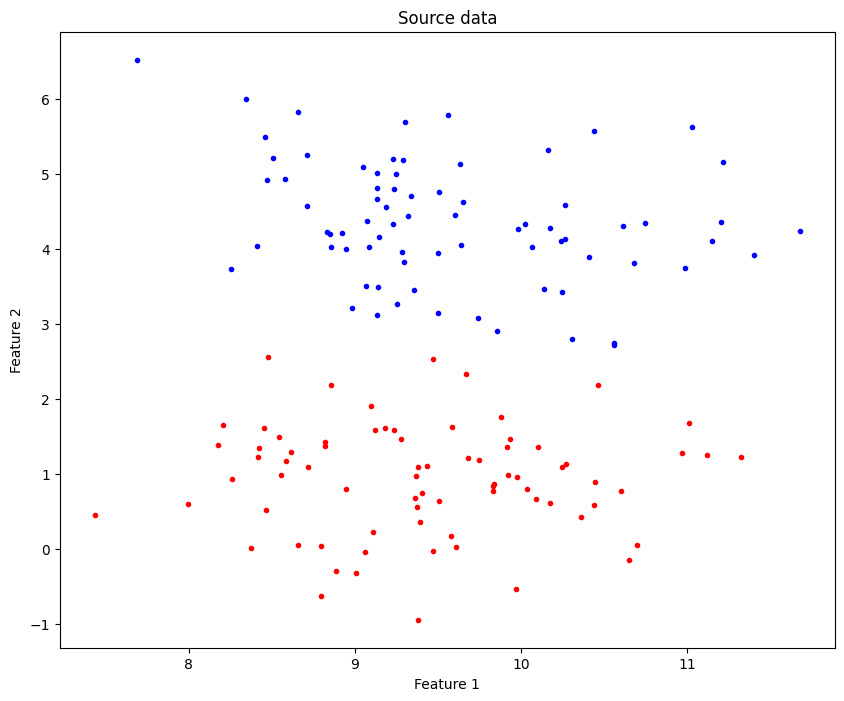

In [13]:
# Change data and epochs
X1, y1, centers1 = datasets.make_blobs(n_samples=150,
                             n_features=2,
                             centers=2,
                             cluster_std=0.8,
                             random_state=4,
                             return_centers=True)

fig = plt.figure(figsize=(10,8))
plt.plot(X1[:, 0][y1 == 0], X1[:, 1][y1 == 0], 'r.')
plt.plot(X1[:, 0][y1 == 1], X1[:, 1][y1 == 1], 'b.')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title('Source data')
plt.show()

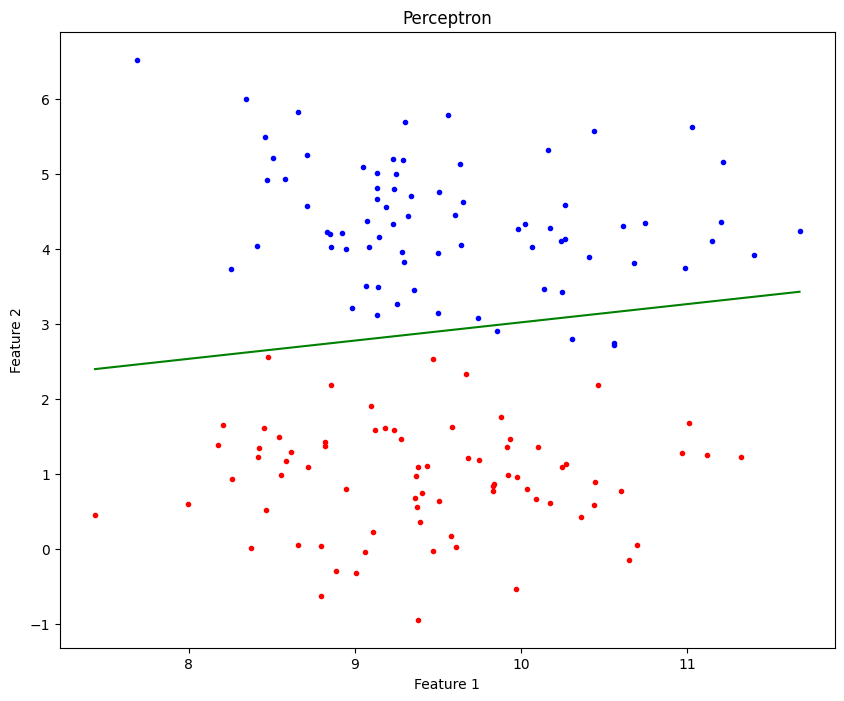

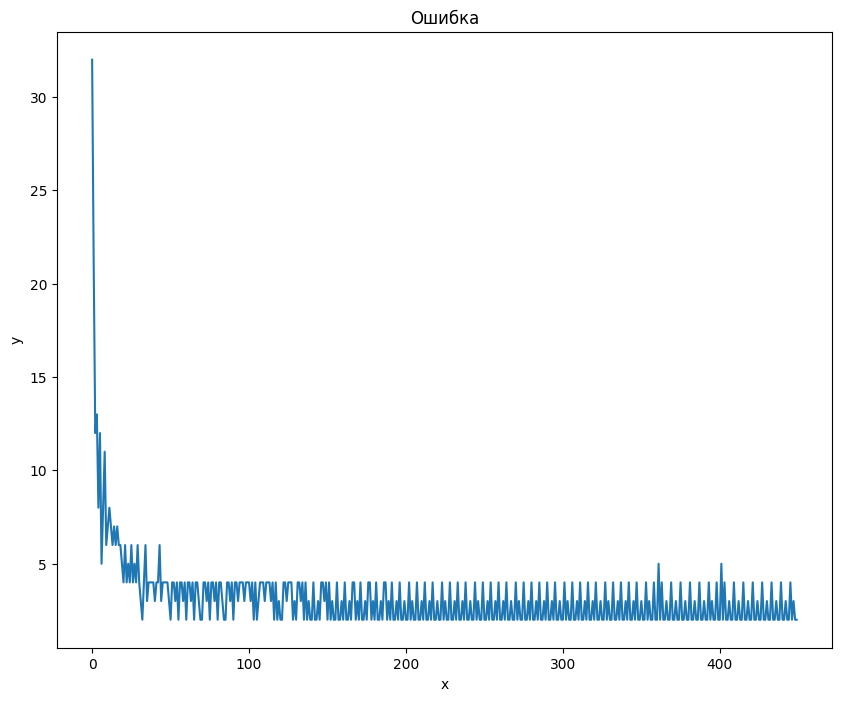

In [14]:
# Increase epochs to 450
w, miss_l = perceptron(X1, y1, 0.5, 450)
plot_decision_boundary(X1, y1, w)

fig = plt.figure(figsize=(10,8))
plt.plot(miss_l)
plt.xlabel("x")
plt.ylabel("y")
plt.title('Ошибка')
plt.show()

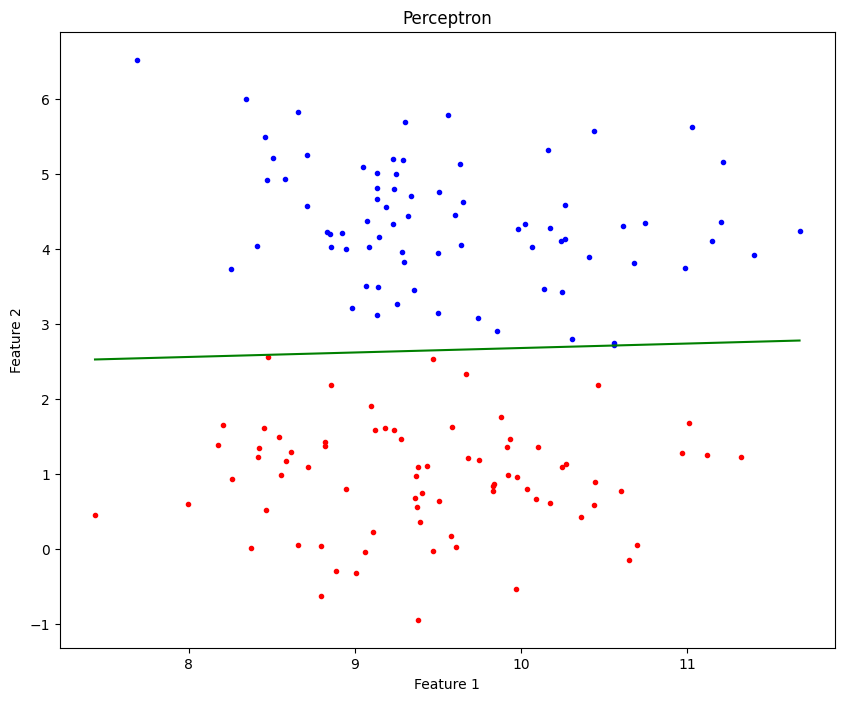

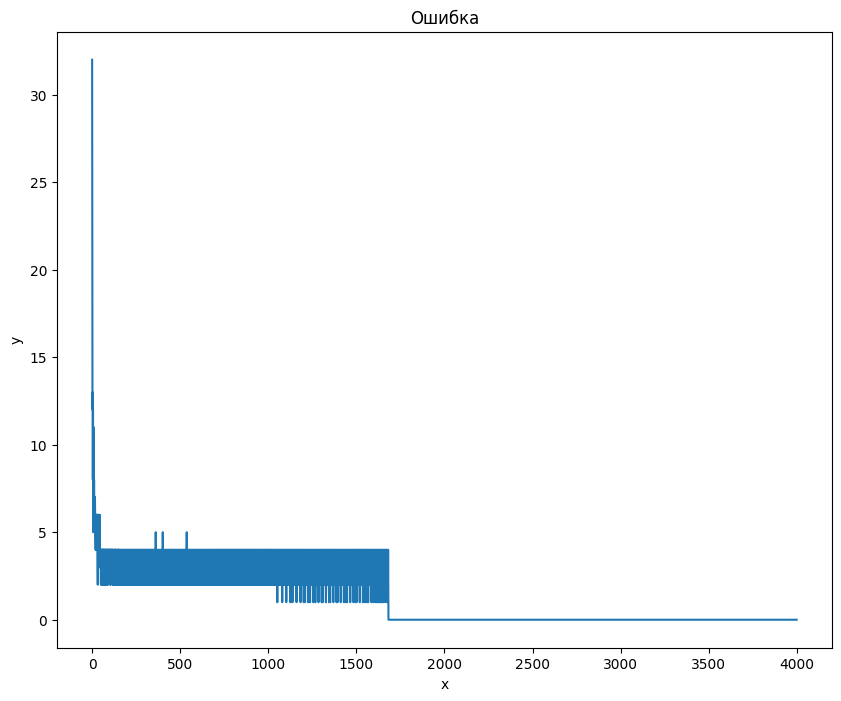

In [15]:
# Increase epochs to 4000
w, miss_l = perceptron(X1, y1, 0.5, 4000)
plot_decision_boundary(X1, y1, w)

fig = plt.figure(figsize=(10,8))
plt.plot(miss_l)
plt.xlabel("x")
plt.ylabel("y")
plt.title('Ошибка')
plt.show()